
# Trabalho de Sistemas Inteligentes para a Bioinformática

Trabalho realizado no âmbito da unidade curricular de Sistemas Inteligentes para a Bioinformática.

Grupo constituído por:

    - Angelina Eiras PG42861
    - Carina Gonçalves PG45466
    - Rute Castro PG45475
    - Sónia Carvalho PG42882


Para a utilização deste notebook é necessário proceder às seguintes instalações:

In [1]:
# pip install git+https://github.com/jcapels/propythia.git@fix_dependencies
#ou download do ficheiro em formato zip
# pip install propythia.zip --user
# pip install seaborn
# pip install --upgrade pip
# pip install tensorflow==2.11.0
# pip install keras
# pip install umap-learn[plot]
# pip install bio-embeddings[all]

In [1]:
import pandas as pd
import scipy.cluster.hierarchy
import seaborn as sn
import numpy as np
from tensorflow import keras
from keras.optimizers.schedules import *
from propythia import *
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.feature_selection import r_regression
from scipy import stats
from scipy.stats import shapiro, levene, mannwhitneyu, ttest_ind
from statsmodels.stats.weightstats import ztest as ztest
import statsmodels.api as statsmodels
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import re
import random
import requests as r
from Bio import SeqIO
from io import StringIO
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.optimizers.schedules import *

from propythia import *
from propythia.protein_descriptores import ProteinDescritors

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.feature_selection import SelectKBest, SelectFromModel
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import auc, roc_curve, matthews_corrcoef, f1_score, roc_auc_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss, hinge_loss, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif, SelectPercentile

import matplotlib.pyplot as plt

2023-01-18 00:47:17.547972: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-18 00:47:17.968663: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-18 00:47:17.968694: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-18 00:47:19.741622: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

resource_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
VarHandleOp: (VarHandleOp): /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
resource: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
value: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
AssignVariableOp: (AssignVariableOp): /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/d

2023-01-18 00:47:34.366409: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-18 00:47:34.366763: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-18 00:47:34.366786: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (angelina-HP): /proc/driver/nvidia/version does not exist
2023-01-18 00:47:34.368156: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Exploração inicial

Nesta secção são apresentados os dados provenientes do desafio Kaggle (https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction).

Os datasets abordam o tema de enzimas que são proteínas que atuam como catalisadores nas reações químicas dos organismos vivos.

O objetivo do trabalho é prever a termoestabilidade de variantes enzimáticas, uma vez que compreender e prever com precisão a estabilidade da proteína é um problema fundamental na biotecnologia. Melhorias na estabilidade da enzima podem reduzir os custos e aumentar a velocidade que os cientistas podem iterar nos conceitos.

Os dados de termoestabilidade (temperatura de fusão) foram medidos experimentalmente e incluem sequências naturais, bem como sequências modificadas com mutações únicas ou múltiplas nas sequências naturais.



## Pré-processamento

Ler os datasets provenientes do desafio

In [ ]:
#train = pd.read_csv("C:/Users/sonia/Downloads/SIB_Trabalho-main-master/kag/train.csv", delimiter=',')
#test = pd.read_csv("C:/Users/sonia/Downloads/SIB_Trabalho-main-master/kag/test.csv", delimiter=',')
#updates = pd.read_csv("C:/Users/sonia/Downloads/SIB_Trabalho-main-master/kag/train_updates_20220929.csv")

In [10]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
updates = pd.read_csv("train_updates_20220929.csv")

In [9]:
print(train.shape)
train.head()

(31390, 4)


,seq_id,protein_sequence,pH,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5


In [4]:
print(updates.shape)
updates.head()

(2434, 5)


,seq_id,protein_sequence,pH,data_source,tm
0,69,NaN,NaN,NaN,NaN
1,70,NaN,NaN,NaN,NaN
2,71,NaN,NaN,NaN,NaN
3,72,NaN,NaN,NaN,NaN
4,73,NaN,NaN,NaN,NaN


In [5]:
print(test.shape)
test.head()

(2413, 4)


,seq_id,protein_sequence,pH,data_source
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


Juntar dataset de treino com os updates dados pela competição

In [11]:
#colunas para fazer o update
col_to_update = ['protein_sequence', 'pH', 'tm']

#seq_id update
to_update_id = list(updates[~updates.protein_sequence.isna()].seq_id)

#faz o update só nas linhas que são necessarias
updates = updates[updates.seq_id.isin(to_update_id)].set_index('seq_id')

#update dos valores no dataset de treino
train.loc[to_update_id, col_to_update] = updates[col_to_update].values

#verificar se está com os updates
pd.concat([train[train.seq_id.isin(to_update_id)].set_index('seq_id'), updates], axis = 1)

#nao precisamos dos links - drop do data_source
train.drop(['data_source'], axis=1, inplace=True)

train

,seq_id,protein_sequence,pH,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5
...,...,...,...,...
31385,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,51.8
31386,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,37.2
31387,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,64.6
31388,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,50.7


### Gerar descritores

Para gerar descritores foi utilizado o propythia, desenvolvido na Universidade do Minho.
Através da sua utilização, foi possível obter descritores físico-químicos que vão ser utilizados para o resto do trabalho.

In [12]:
#obter os descritores
descriptors_df = ProteinDescritors(dataset= train ,  col= 'protein_sequence')
descriptors_df.dataset

,seq_id,protein_sequence,pH,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5
...,...,...,...,...
31385,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,51.8
31386,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,37.2
31387,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,64.6
31388,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,50.7


In [21]:
# tamanho das sequencias
descriptors_df.get_lenght(n_jobs=4)

,protein_sequence,length
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,341.0
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,286.0
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,497.0
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,265.0
4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,1451.0
...,...,...
28976,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,549.0
28977,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,469.0
28978,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,128.0
28979,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,593.0


In [22]:
# quantidades de aminoácidos
descriptors_df.get_aa_comp(n_jobs=4)

,protein_sequence,A,R,N,D,C,E,Q,G,H,...,L,K,M,F,P,S,T,W,Y,V
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,13.196,7.331,1.466,3.812,0.293,8.798,1.760,11.144,0.880,...,10.850,4.692,2.346,3.812,5.279,3.226,4.106,1.173,0.880,10.850
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,9.790,10.490,2.098,3.497,0.000,18.182,7.692,6.294,1.399,...,8.042,6.643,0.699,2.098,2.797,4.895,4.196,1.049,1.049,4.545
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,10.060,6.237,3.018,5.433,1.811,6.439,5.030,13.078,2.213,...,3.622,7.847,1.207,4.225,4.024,6.640,6.036,0.604,3.219,6.036
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.547,3.774,3.396,7.170,1.887,10.943,3.396,6.038,2.642,...,10.566,6.415,0.755,4.528,6.038,6.038,7.170,1.132,1.509,5.283
4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,5.927,4.342,4.480,5.376,0.965,5.376,3.722,5.789,2.757,...,7.167,4.686,2.136,2.205,8.822,10.200,8.270,1.103,3.239,8.546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28976,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,6.011,7.650,4.372,6.922,2.186,5.647,4.372,9.290,2.732,...,8.379,5.829,2.368,3.279,4.554,6.011,3.279,2.368,3.279,7.650
28977,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.889,5.330,4.051,4.478,1.066,6.183,3.412,5.757,4.691,...,10.021,4.264,2.985,4.691,4.051,7.889,5.544,1.066,2.985,7.249
28978,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,10.156,2.344,3.906,5.469,0.781,5.469,6.250,8.594,1.562,...,4.688,6.250,5.469,5.469,4.688,7.812,4.688,3.125,3.125,5.469
28979,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.926,4.216,4.216,5.734,0.843,6.071,2.024,8.769,1.855,...,7.589,5.902,4.384,3.879,5.228,8.600,5.396,0.506,3.035,8.094


Descritores físico-químicos gerados:
  
length, charge, chargedensity, formulaC, formulaH, formulaN, formulaO, formulaS, tot, hydrogen, single, double, MW_modlamp, Gravy, Aromacity, IsoelectricPoint, Instability_index, SecStruct_helix, SecStruct_turn, SecStruct_sheet, Molar_extinction_coefficient_reduced, Molar_extinction_coefficient_oxidized, aliphatic_index, bomanindex, hydrophobic_ratio.

In [24]:
all_descriptors = descriptors_df.get_all_physicochemical(ph=7, amide=False, n_jobs=4)
all_descriptors.to_csv('descriptors.csv')
all_descriptors

/usr/local/lib/python3.8/dist-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.1.0)/charset_normalizer (2.0.10) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
/usr/local/lib/python3.8/dist-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.1.0)/charset_normalizer (2.0.10) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
/usr/local/lib/python3.8/dist-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.1.0)/charset_normalizer (2.0.10) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
/usr/local/lib/python3.8/dist-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.1.0)/chars

resource_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
VarHandleOp: (VarHandleOp): /job:localhost/replica:0/task:0/device:CPU:0
resource: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
value: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
AssignVariableOp: (AssignVariableOp): /job:localhost/replica:0/task:0/device:CPU:0
input: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
_EagerConst: (_EagerConst): /job:localhost/replica:0/task:0/device:CPU:0
output_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
resource_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
VarHandleOp: (VarHandleOp): /job:localhost/replica:0/task:0/device:CPU:0
resource: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
value: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
AssignVariableOp: (AssignVariableOp): /job:localhost/replica:0/task:0/device:CPU:0
input: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
_EagerConst: (_EagerConst): /job

,seq_id,protein_sequence,pH,tm,length_x,charge_x,chargedensity_x,formulaC_x,formulaH_x,formulaN_x,...,IsoelectricPoint,Instability_index,SecStruct_helix,SecStruct_turn,SecStruct_sheet,Molar_extinction_coefficient_reduced,Molar_extinction_coefficient_oxidized,aliphatic_index,bomanindex,hydrophobic_ratio
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7,341.0,-1.732,-0.000048,1622,2623,447,...,6.109589,28.389736,0.316716,0.211144,0.351906,26470,26470,102.991202,1.020440,0.454545
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5,286.0,-12.537,-0.000382,1385,2224,412,...,5.144349,65.108392,0.213287,0.160839,0.367133,20970,20970,72.062937,3.240490,0.297203
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5,497.0,11.513,0.000215,2290,3559,669,...,9.032101,35.089336,0.209256,0.267606,0.213280,40340,40840,54.245473,2.168934,0.301811
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2,265.0,-20.606,-0.000699,1293,2006,338,...,4.683840,50.502264,0.267925,0.215094,0.298113,22460,22710,78.792453,1.902415,0.343396
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5,1451.0,-21.900,-0.000138,6948,10869,1869,...,5.917928,45.668808,0.271537,0.292901,0.206065,158030,158905,77.746382,1.684390,0.318401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28976,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,51.8,549.0,5.709,0.000092,2710,4196,774,...,8.466327,48.604026,0.287796,0.242259,0.224044,98320,99070,75.792350,2.063898,0.336976
28977,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,37.2,469.0,-3.132,-0.000060,2342,3642,632,...,6.532244,35.285096,0.324094,0.217484,0.270789,48360,48610,92.942431,1.389019,0.402985
28978,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,64.6,128.0,-2.866,-0.000202,626,936,158,...,5.271214,44.198437,0.265625,0.250000,0.257812,27960,27960,62.578125,1.293672,0.367188
28979,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,50.7,593.0,-9.209,-0.000143,2832,4477,753,...,5.688128,36.618398,0.288364,0.268128,0.259696,43320,43570,83.355818,1.334250,0.384486


### Importar dados físico-químicos

Estes dados são provenientes do código anterior, onde foram colocadas todas as características físico-químicas num único ficheiro csv, de maneira a facilitar e agilizar o processo.

In [2]:
dataset = pd.read_csv("descriptors.csv", delimiter=',')

# shape e data types
print(dataset.shape, dataset.dtypes)
dataset.head()

(28981, 38) Unnamed: 0                                 int64
seq_id                                     int64
protein_sequence                          object
pH                                       float64
tm                                       float64
length_x                                 float64
charge_x                                 float64
chargedensity_x                          float64
formulaC_x                                 int64
formulaH_x                                 int64
formulaN_x                                 int64
formulaO_x                                 int64
formulaS_x                                 int64
length_y                                 float64
charge_y                                 float64
chargedensity_y                          float64
formulaC_y                                 int64
formulaH_y                                 int64
formulaN_y                                 int64
formulaO_y                                 int64
formulaS

,Unnamed: 0,seq_id,protein_sequence,pH,tm,length_x,charge_x,chargedensity_x,formulaC_x,formulaH_x,...,IsoelectricPoint,Instability_index,SecStruct_helix,SecStruct_turn,SecStruct_sheet,Molar_extinction_coefficient_reduced,Molar_extinction_coefficient_oxidized,aliphatic_index,bomanindex,hydrophobic_ratio
0,0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7,341.0,-1.732,-0.000048,1622,2623,...,6.109589,28.389736,0.316716,0.211144,0.351906,26470,26470,102.991202,1.020440,0.454545
1,1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5,286.0,-12.537,-0.000382,1385,2224,...,5.144349,65.108392,0.213287,0.160839,0.367133,20970,20970,72.062937,3.240490,0.297203
2,2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5,497.0,11.513,0.000215,2290,3559,...,9.032101,35.089336,0.209256,0.267606,0.213280,40340,40840,54.245473,2.168934,0.301811
3,3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2,265.0,-20.606,-0.000699,1293,2006,...,4.683840,50.502264,0.267925,0.215094,0.298113,22460,22710,78.792453,1.902415,0.343396
4,4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5,1451.0,-21.900,-0.000138,6948,10869,...,5.917928,45.668808,0.271537,0.292901,0.206065,158030,158905,77.746382,1.684390,0.318401


sumarização de valores estatísticos gerais

In [30]:
dataset.describe()
#as variáveis têm valores em gamas muito diferentes, 
#por isso será preciso fazer normalização dos dados


,Unnamed: 0,seq_id,pH,tm,length_x,charge_x,chargedensity_x,formulaC_x,formulaH_x,formulaN_x,...,IsoelectricPoint,Instability_index,SecStruct_helix,SecStruct_turn,SecStruct_sheet,Molar_extinction_coefficient_reduced,Molar_extinction_coefficient_oxidized,aliphatic_index,bomanindex,hydrophobic_ratio
count,28981.000000,28981.000000,28723.000000,28981.000000,28981.000000,28981.000000,28981.000000,28981.000000,28981.000000,28981.000000,...,28981.000000,28981.000000,28981.000000,28981.000000,28981.000000,2.898100e+04,2.898100e+04,28981.000000,28981.000000,28981.000000
mean,14490.000000,15636.851799,6.939760,49.362506,467.457955,-5.387968,-0.000062,2289.318312,3591.024844,617.183362,...,6.746451,40.387276,0.296243,0.226479,0.267611,4.886613e+04,4.926834e+04,85.275101,1.678076,0.370964
std,8366.238412,9249.803462,0.618616,13.690421,660.449455,19.253890,0.000333,3226.765176,5095.516861,864.542580,...,1.688154,11.377370,0.044462,0.043938,0.048329,7.670408e+04,7.734835e+04,14.350593,0.552967,0.049312
min,0.000000,0.000000,1.990000,0.000000,5.000000,-903.437000,-0.002708,22.000000,40.000000,8.000000,...,4.050028,-7.383333,0.022727,0.030769,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.661429,0.045977
25%,7245.000000,7493.000000,7.000000,42.300000,220.000000,-9.865000,-0.000232,1092.000000,1712.000000,291.000000,...,5.405866,33.237674,0.275214,0.199446,0.237500,1.994000e+04,2.040000e+04,77.153076,1.378288,0.343096
50%,14490.000000,15303.000000,7.000000,48.000000,355.000000,-3.311000,-0.000082,1743.000000,2731.000000,467.000000,...,6.141703,39.604879,0.299525,0.222477,0.265611,3.495000e+04,3.541000e+04,85.656934,1.656480,0.372998
75%,21735.000000,23848.000000,7.000000,53.600000,542.000000,3.006000,0.000084,2680.000000,4162.000000,715.000000,...,8.393091,46.698369,0.319703,0.246667,0.293447,6.039000e+04,6.089000e+04,93.934066,1.978816,0.400000
max,28980.000000,31389.000000,11.000000,130.000000,32767.000000,396.696000,0.002890,161074.000000,255327.000000,42607.000000,...,11.999968,141.642748,0.632653,0.747126,0.579832,3.920520e+06,3.951645e+06,194.285714,5.281972,0.637681


Valores omissos

In [38]:
#confirmar que não há dados omissos 
dataset.isnull().sum()#.sum() #output: não há dados omissos excepto no pH, 258

Unnamed: 0                                 0
seq_id                                     0
protein_sequence                           0
pH                                       258
tm                                         0
length_x                                   0
charge_x                                   0
chargedensity_x                            0
formulaC_x                                 0
formulaH_x                                 0
formulaN_x                                 0
formulaO_x                                 0
formulaS_x                                 0
length_y                                   0
charge_y                                   0
chargedensity_y                            0
formulaC_y                                 0
formulaH_y                                 0
formulaN_y                                 0
formulaO_y                                 0
formulaS_y                                 0
tot                                        0
hydrogen  

perceber se há colunas com todos os valores iguais (variância = zero)

In [3]:
# criar um threshold e eliminar columas com variancia zero
variances = dataset.var(axis=0)

for column in dataset.columns:
    if variances.get(column) == 0.0:
        print("removed",column)
        dataset = dataset.drop(column, axis=1)
dataset.var(axis=0)


removed tot
removed hydrogen
removed single
removed double


Unnamed: 0                               6.999395e+07
seq_id                                   8.555886e+07
pH                                       3.826863e-01
tm                                       1.874276e+02
length_x                                 4.361935e+05
charge_x                                 3.707123e+02
chargedensity_x                          1.110529e-07
formulaC_x                               1.041201e+07
formulaH_x                               2.596429e+07
formulaN_x                               7.474339e+05
formulaO_x                               1.067321e+06
formulaS_x                               5.117109e+02
length_y                                 4.361935e+05
charge_y                                 3.707123e+02
chargedensity_y                          1.110529e-07
formulaC_y                               1.041201e+07
formulaH_y                               2.596429e+07
formulaN_y                               7.474339e+05
formulaO_y                  

In [4]:
# eliminar linhas duplicadas, drop das duas colunas para ser possível fazer o pre porcessamento dos dados
df = dataset.drop_duplicates(subset = "seq_id")
df = df.drop(columns=['seq_id', 'protein_sequence'], axis=1)
df.columns

Index(['Unnamed: 0', 'pH', 'tm', 'length_x', 'charge_x', 'chargedensity_x',
       'formulaC_x', 'formulaH_x', 'formulaN_x', 'formulaO_x', 'formulaS_x',
       'length_y', 'charge_y', 'chargedensity_y', 'formulaC_y', 'formulaH_y',
       'formulaN_y', 'formulaO_y', 'formulaS_y', 'MW_modlamp', 'Gravy',
       'Aromacity', 'IsoelectricPoint', 'Instability_index', 'SecStruct_helix',
       'SecStruct_turn', 'SecStruct_sheet',
       'Molar_extinction_coefficient_reduced',
       'Molar_extinction_coefficient_oxidized', 'aliphatic_index',
       'bomanindex', 'hydrophobic_ratio'],
      dtype='object')

Visualização rápida de histograma de todas as variáveis

Podemos ver que a maior parte não parece seguir distribuição normal

array([[<AxesSubplot: title={'center': 'Unnamed: 0'}>,
        <AxesSubplot: title={'center': 'pH'}>,
        <AxesSubplot: title={'center': 'tm'}>,
        <AxesSubplot: title={'center': 'length_x'}>,
        <AxesSubplot: title={'center': 'charge_x'}>,
        <AxesSubplot: title={'center': 'chargedensity_x'}>],
       [<AxesSubplot: title={'center': 'formulaC_x'}>,
        <AxesSubplot: title={'center': 'formulaH_x'}>,
        <AxesSubplot: title={'center': 'formulaN_x'}>,
        <AxesSubplot: title={'center': 'formulaO_x'}>,
        <AxesSubplot: title={'center': 'formulaS_x'}>,
        <AxesSubplot: title={'center': 'length_y'}>],
       [<AxesSubplot: title={'center': 'charge_y'}>,
        <AxesSubplot: title={'center': 'chargedensity_y'}>,
        <AxesSubplot: title={'center': 'formulaC_y'}>,
        <AxesSubplot: title={'center': 'formulaH_y'}>,
        <AxesSubplot: title={'center': 'formulaN_y'}>,
        <AxesSubplot: title={'center': 'formulaO_y'}>],
       [<AxesSubplot:

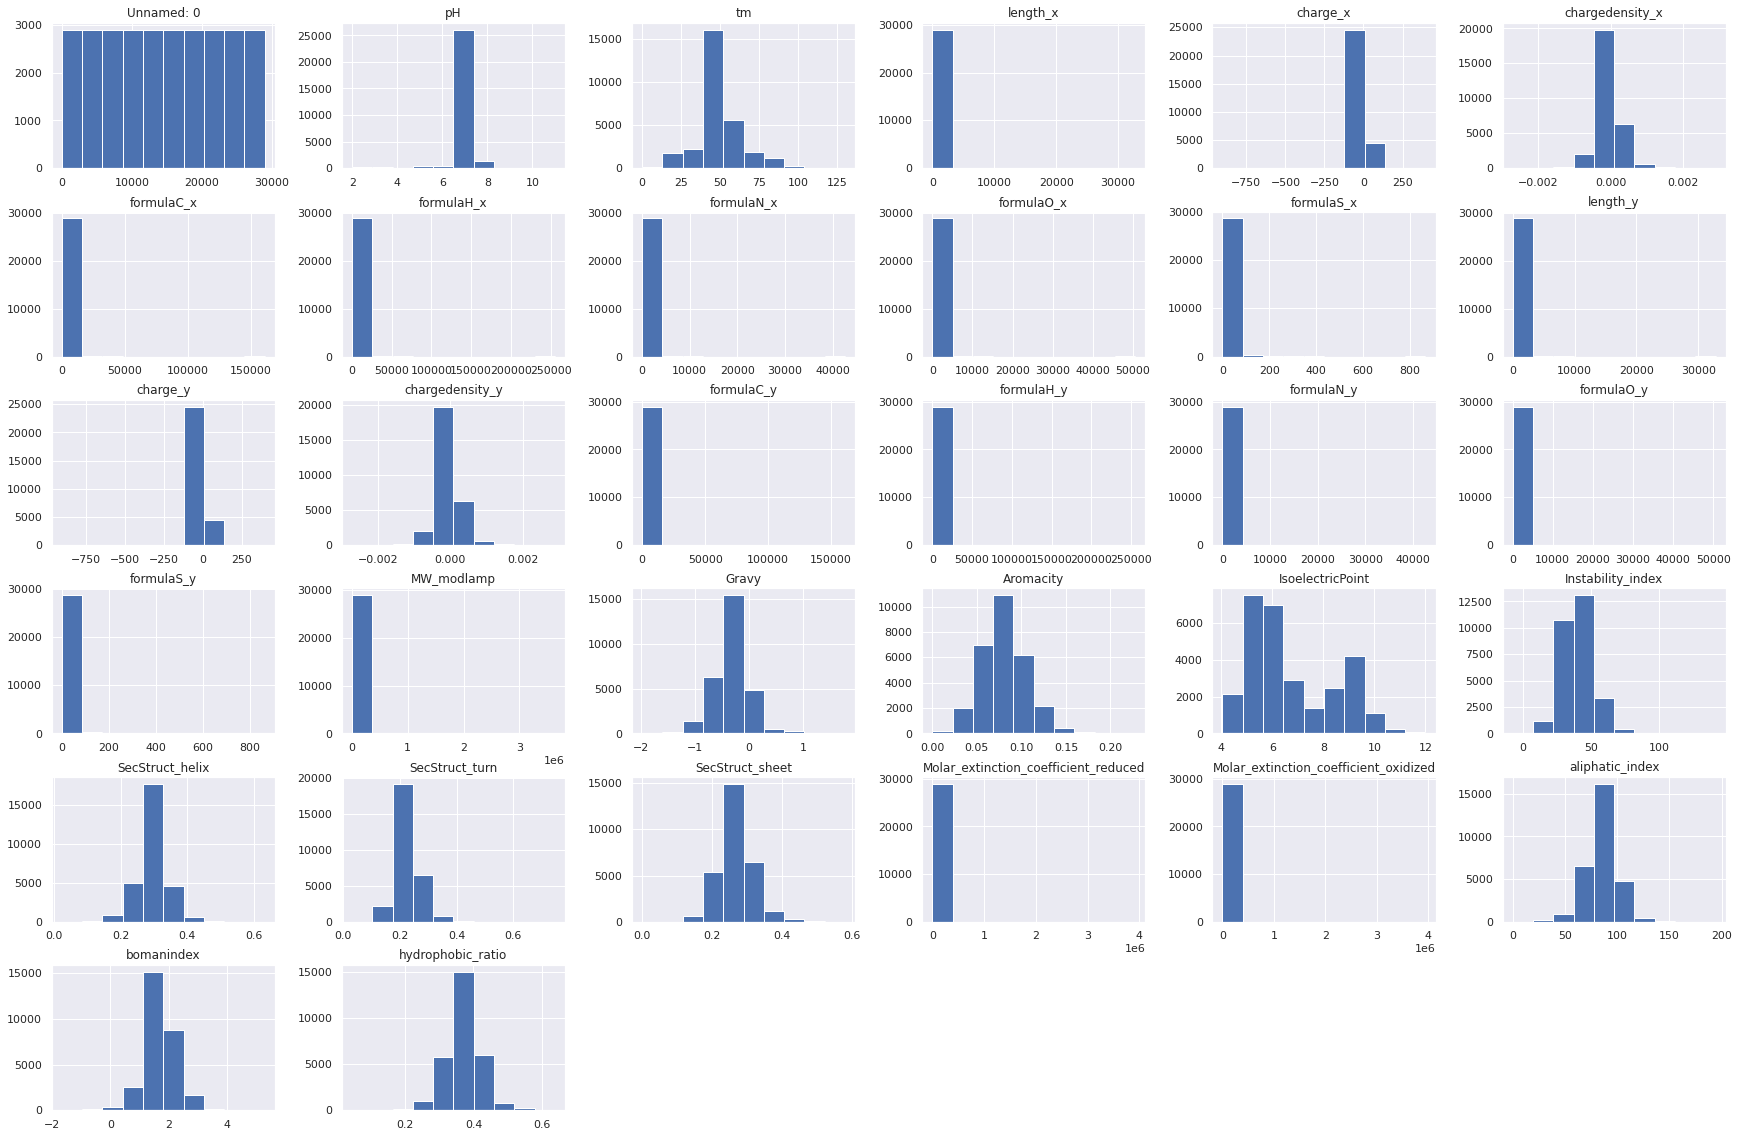

In [10]:
df.hist(figsize=(30,20))
#pd.DataFrame.hist()

#para apresentação, o histograma precisa de ser melhorado (legendas, etc)
#as primeiras variáveis (seq_id, unnamed) não deverão ser usadas

#testar normalidade dos dados quantitativamente com o teste shapiro - COMO FAZER? DEU SEMPRE ERRO

Teste Shapiro para verificar a normalidade dos dados

In [11]:
scipy.stats.shapiro(x = df)
# rejeita se a Ho, os dados não estão normais

ShapiroResult(statistic=nan, pvalue=1.0)

Normalização dos dados através do Standard Scaler 

In [12]:
#fazer normalização dos dados de X
data = StandardScaler().fit(df)
data_st = data.transform(df)

#sumariar os dados transformados (atenção que agora é array numpy e não panda dataframe)
np.set_printoptions(precision = 3)

#converter de novo a panda dataframe 
data_scale =  pd.DataFrame(data_st, index =df.index , columns = df.columns)
data_scale

#sumariar estatísticas
data_scale.describe()

,Unnamed: 0,pH,tm,length_x,charge_x,chargedensity_x,formulaC_x,formulaH_x,formulaN_x,formulaO_x,...,IsoelectricPoint,Instability_index,SecStruct_helix,SecStruct_turn,SecStruct_sheet,Molar_extinction_coefficient_reduced,Molar_extinction_coefficient_oxidized,aliphatic_index,bomanindex,hydrophobic_ratio
count,2.898100e+04,2.872300e+04,2.898100e+04,28981.000000,2.898100e+04,2.898100e+04,2.898100e+04,2.898100e+04,2.898100e+04,2.898100e+04,...,2.898100e+04,2.898100e+04,2.898100e+04,2.898100e+04,2.898100e+04,2.898100e+04,2.898100e+04,2.898100e+04,2.898100e+04,2.898100e+04
mean,6.276489e-17,1.232930e-15,-1.510280e-16,0.000000,-2.059473e-17,2.353684e-17,9.807015e-18,1.765263e-17,-1.372982e-17,-2.059473e-17,...,-3.937516e-16,9.414734e-17,1.098386e-15,3.452069e-16,5.413472e-16,4.511227e-17,2.549824e-17,7.061051e-17,5.060420e-16,-4.687753e-16
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.731991e+00,-8.001478e+00,-3.605686e+00,-0.700229,-4.664328e+01,-7.940413e+00,-7.026720e-01,-6.969040e-01,-7.046430e-01,-6.918300e-01,...,-1.597289e+00,-4.198811e+00,-6.151778e+00,-4.454341e+00,-5.537319e+00,-6.370843e-01,-6.369779e-01,-5.942373e+00,-6.039355e+00,-6.590600e+00
25%,-8.659955e-01,9.738009e-02,-5.158810e-01,-0.374688,-2.325301e-01,-5.106466e-01,-3.710648e-01,-3.687668e-01,-3.772966e-01,-3.733693e-01,...,-7.941272e-01,-6.284163e-01,-4.729791e-01,-6.152686e-01,-6.230423e-01,-3.771198e-01,-3.732315e-01,-5.659812e-01,-5.421544e-01,-5.651504e-01
50%,0.000000e+00,9.738009e-02,-9.952433e-02,-0.170278,1.078745e-01,-5.836422e-02,-1.693113e-01,-1.687836e-01,-1.737172e-01,-1.768723e-01,...,-3.582366e-01,-6.876898e-02,7.380930e-02,-9.108264e-02,-4.137285e-02,-1.814293e-01,-1.791710e-01,2.660798e-02,-3.905539e-02,4.123872e-02
75%,8.659955e-01,9.738009e-02,3.095279e-01,0.112868,4.359697e-01,4.391456e-01,1.210774e-01,1.120563e-01,1.131446e-01,1.057737e-01,...,9.754252e-01,5.547154e-01,5.276437e-01,4.594712e-01,5.346018e-01,1.502407e-01,1.502535e-01,6.033977e-01,5.438764e-01,5.888335e-01
max,1.731991e+00,6.563534e+00,5.890168e+00,48.906240,2.088362e+01,8.860575e+00,4.920948e+01,4.940428e+01,4.856966e+01,4.827562e+01,...,3.112043e+00,8.899879e+00,7.566370e+00,1.184991e+01,6.460384e+00,5.047607e+01,5.045284e+01,7.596376e+00,6.517497e+00,5.408905e+00


verificar a normalidade da termoestabilidade após StandardScaler

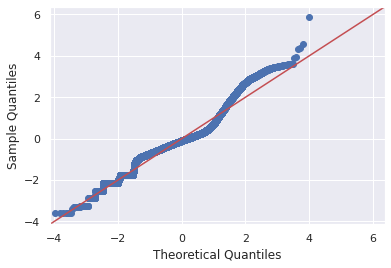

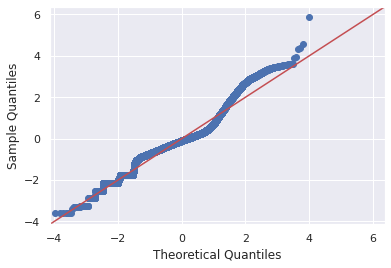

In [13]:
statsmodels.qqplot(data_scale.tm, dist = stats.norm, line = '45', ax = None)


Distribuição da termoestabilidade

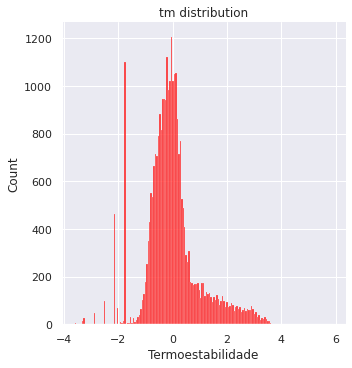

In [14]:

sn.displot(data = data_scale, x = 'tm', color = 'red')
plt.xlabel('Termoestabilidade')
plt.title('tm distribution')
plt.show()

Como a distribuição geral dos dados não parece normal, vamos realizar o teste de Shapiro

In [15]:
scipy.stats.shapiro(x = data_scale)
# rejeita se a Ho, os dados não estão normais

ShapiroResult(statistic=nan, pvalue=1.0)

Correlação entre as variaveis

In [16]:
corr_matrix = data_scale.corr()
#corr_matrix

#transformar em pandas dataframe (mais facil visualizaçao)
corr_dataframe = pd.DataFrame(corr_matrix)
corr_dataframe

,Unnamed: 0,pH,tm,length_x,charge_x,chargedensity_x,formulaC_x,formulaH_x,formulaN_x,formulaO_x,...,IsoelectricPoint,Instability_index,SecStruct_helix,SecStruct_turn,SecStruct_sheet,Molar_extinction_coefficient_reduced,Molar_extinction_coefficient_oxidized,aliphatic_index,bomanindex,hydrophobic_ratio
Unnamed: 0,1.000000,-0.004617,0.000996,0.002492,0.016530,0.015816,0.002691,0.003294,0.002857,0.002278,...,0.005114,-0.049025,0.024251,-0.009163,-0.021789,0.000410,0.000252,0.031484,-0.004293,0.009474
pH,-0.004617,1.000000,0.065170,0.030874,-0.042675,-0.177474,0.031815,0.030929,0.029485,0.028992,...,-0.184284,0.103651,0.037835,0.059295,0.070305,0.013421,0.013113,0.028963,-0.083109,0.023349
tm,0.000996,0.065170,1.000000,-0.070513,0.054078,-0.013930,-0.069392,-0.068449,-0.068517,-0.077403,...,-0.028467,-0.034556,0.169724,-0.054552,0.238146,-0.060639,-0.061235,0.227996,-0.106630,0.187680
length_x,0.002492,0.030874,-0.070513,1.000000,-0.518174,-0.087305,0.999461,0.999397,0.999342,0.999089,...,-0.096442,0.146487,-0.097286,0.084933,-0.022692,0.933200,0.934026,-0.066121,0.077423,-0.108650
charge_x,0.016530,-0.042675,0.054078,-0.518174,1.000000,0.590194,-0.515206,-0.511135,-0.509040,-0.536892,...,0.589983,-0.050729,0.046344,0.054956,-0.121973,-0.459450,-0.460300,0.027712,-0.052301,0.059374
chargedensity_x,0.015816,-0.177474,-0.013930,-0.087305,0.590194,1.000000,-0.086104,-0.082138,-0.077994,-0.098559,...,0.885068,-0.030625,-0.041439,0.075109,-0.212231,-0.073170,-0.073234,-0.035720,0.058963,-0.013038
formulaC_x,0.002691,0.031815,-0.069392,0.999461,-0.515206,-0.086104,1.000000,0.999832,0.999091,0.998322,...,-0.095393,0.142946,-0.080561,0.070890,-0.021302,0.939086,0.939829,-0.058513,0.075726,-0.102677
formulaH_x,0.003294,0.030929,-0.068449,0.999397,-0.511135,-0.082138,0.999832,1.000000,0.999128,0.998248,...,-0.091594,0.142774,-0.082466,0.066636,-0.015508,0.935320,0.936067,-0.053242,0.077551,-0.099330
formulaN_x,0.002857,0.029485,-0.068517,0.999342,-0.509040,-0.077994,0.999091,0.999128,1.000000,0.998746,...,-0.086791,0.156071,-0.104124,0.078486,-0.021795,0.932290,0.933107,-0.072526,0.096852,-0.118059
formulaO_x,0.002278,0.028992,-0.077403,0.999089,-0.536892,-0.098559,0.998322,0.998248,0.998746,1.000000,...,-0.107259,0.155847,-0.112441,0.082222,-0.025915,0.927728,0.928554,-0.080731,0.099505,-0.128045


Heatmap da correlação

As variaveis mais correlacionadas são as formulaC, formulaN, formulaO formulaS, com o tamanho, a carga, o Molar_extinction_coefficient_reduced e o Molar_extinction_coefficient_oxidized

<AxesSubplot: >

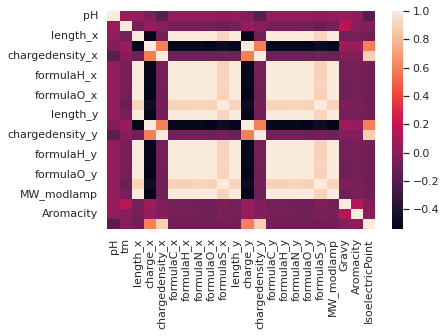

In [17]:
sn.heatmap(corr_matrix.iloc[1:23,1:23], annot=False)

Clustermap da correlação

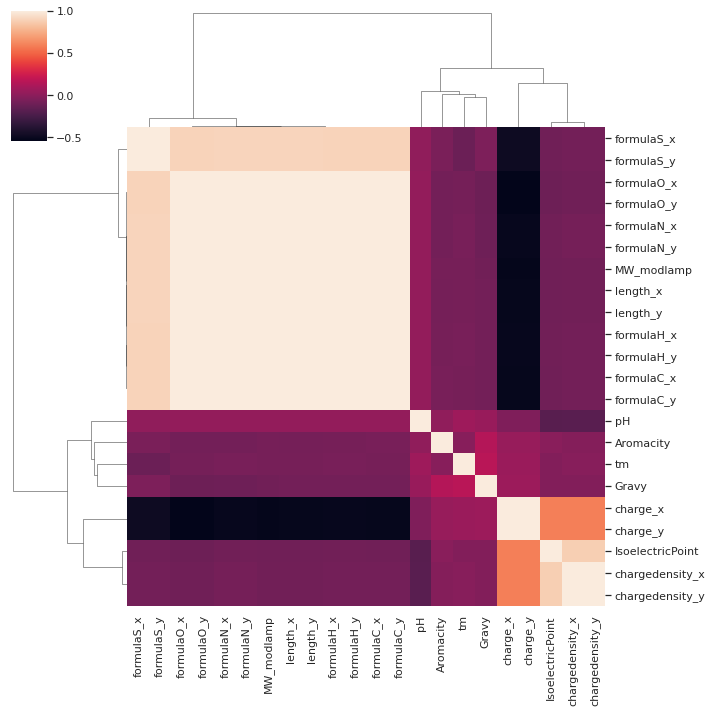

In [18]:
#clustermap / clustering hierárquico
sn.clustermap(corr_matrix.iloc[1:23,1:23])

In [ ]:
#o Y tem sempre correlações inferiores a 0.25 com as outras variáveis

#idealmente deviamos eliminar as variáveis do X que estão muito correlacionadas entre si,
#porque não vão adicionar mais info à análise ----> justificar a sua correlação fazer sentido
#do ponto de vista biológico (por exemplo, as variáveis das fórmulas estão todas muito relacionadas entre si)

Seleção de features que têm uma correlação muito elevada, superior a 0.8

Resultado: {'bomanindex', 'formulaH', 'formulaO', 'hydrophobic_ratio', 'Molar_extinction_coefficient_reduced', 'formulaC', 'IsoelectricPoint', 'formulaN', 'formulaS', 'Molar_extinction_coefficient_oxidized', 'MW_modlamp'}


In [24]:
correlated_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

len(correlated_features)
print(correlated_features)

{'formulaN_x', 'Molar_extinction_coefficient_oxidized', 'formulaO_y', 'formulaS_y', 'Molar_extinction_coefficient_reduced', 'formulaN_y', 'length_y', 'charge_y', 'bomanindex', 'MW_modlamp', 'hydrophobic_ratio', 'IsoelectricPoint', 'formulaO_x', 'formulaC_y', 'formulaH_x', 'formulaS_x', 'formulaH_y', 'formulaC_x', 'chargedensity_y'}


Dada a elevada correlação entre as features anteriores, decidimos retira-las da análise seguinte de maneira a obter melhores resultados.

features retiradas: 


In [25]:
drop_features = {'Molar_extinction_coefficient_reduced', 'Molar_extinction_coefficient_oxidized', 'formulaC', 'hydrophobic_ratio', 'formulaO', 'IsoelectricPoint', 'formulaN', 'MW_modlamp', 'formulaH', 'formulaS', 'bomanindex'}
#data_scale.columns # KeyError: "['formulaC', 'formulaS', 'formulaO', 'formulaH', 'formulaN'] not found in axis"
data_scale.drop(labels = correlated_features, axis = 1, inplace = True)


Ficamos apenas com as seguintes colunas: 

In [26]:
data_scale.columns

Index(['Unnamed: 0', 'pH', 'tm', 'length_x', 'charge_x', 'chargedensity_x',
       'Gravy', 'Aromacity', 'Instability_index', 'SecStruct_helix',
       'SecStruct_turn', 'SecStruct_sheet', 'aliphatic_index'],
      dtype='object')

Correlação das features finais

<AxesSubplot: >

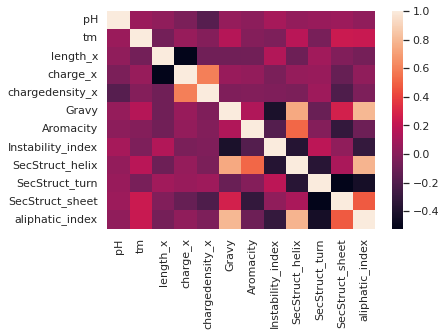

In [31]:
corr = data_scale.corr()
sn.heatmap(corr.iloc[1:23,1:23], annot=False)

Boxplots para cada variável continua

O objetivo é perceber se os valores são parecidos, se há outliers

<AxesSubplot: >

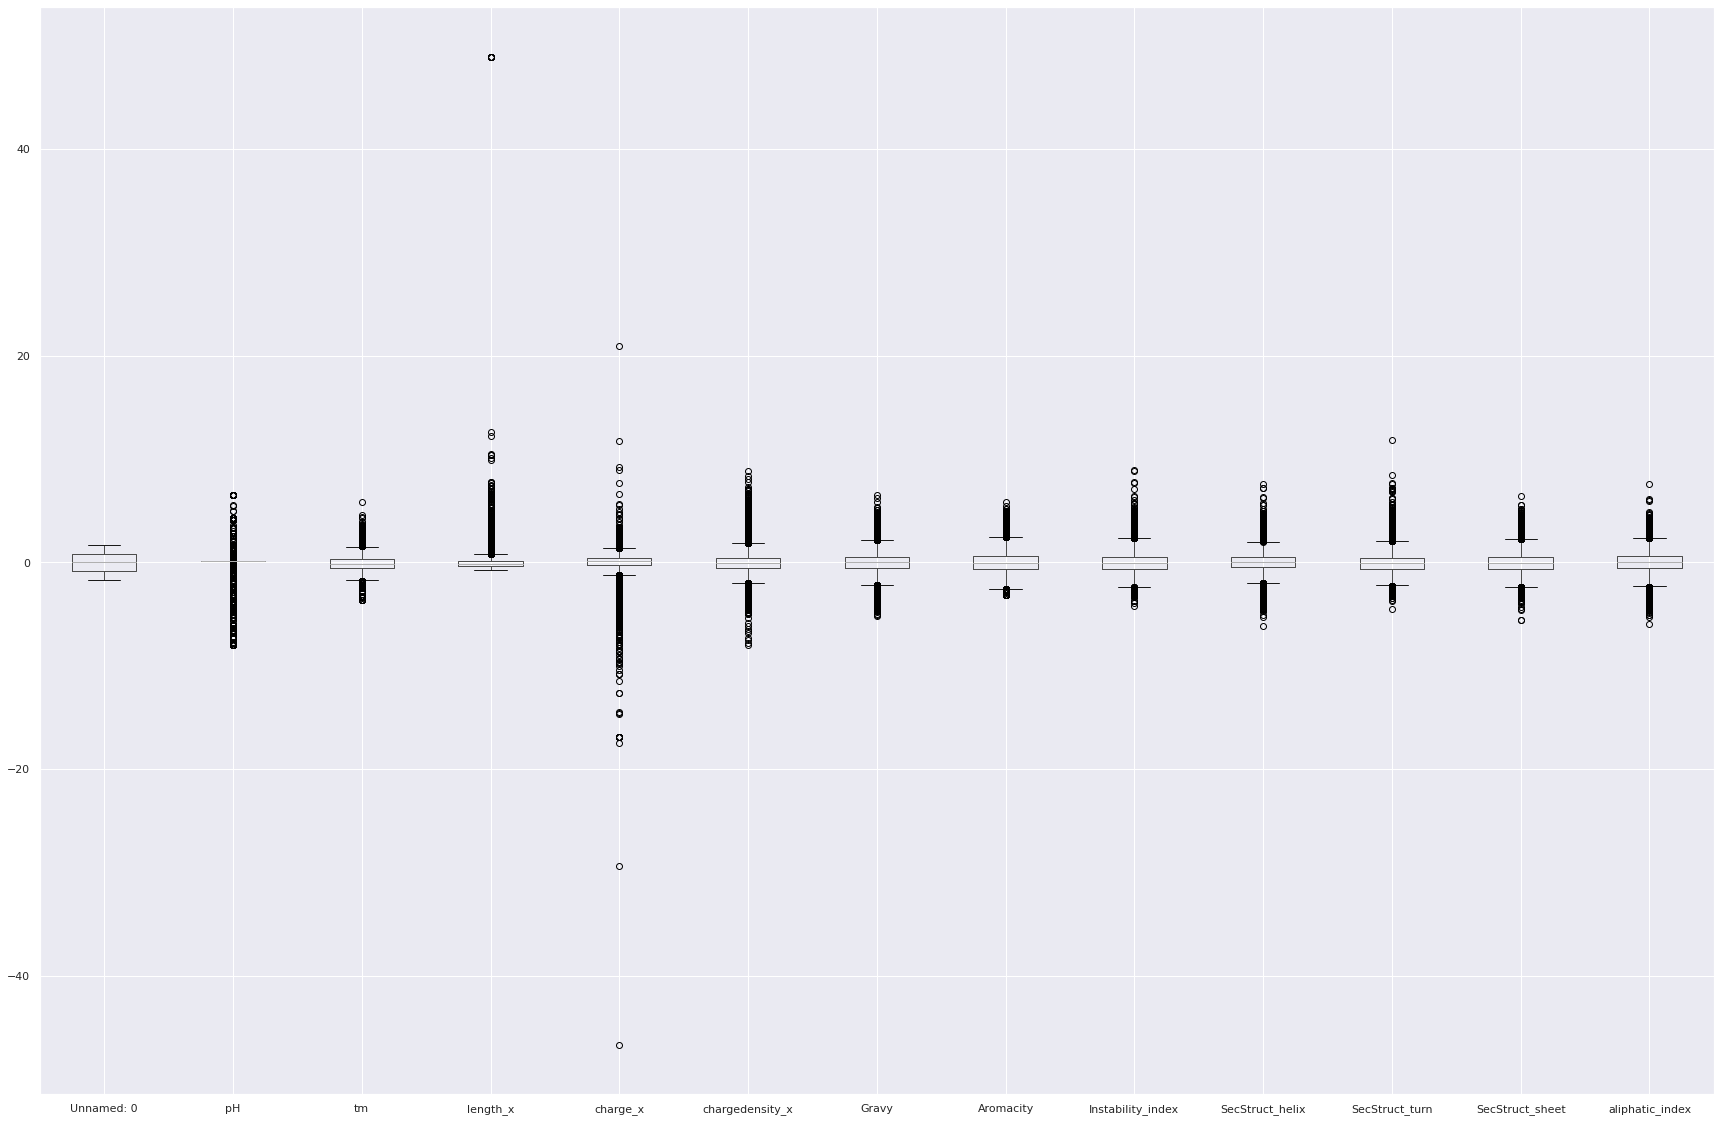

In [33]:
data_scale.boxplot(figsize=(30, 20))

### Análise não supervisionada

In [ ]:
data_scale

In [ ]:
#separar X e Y 
X = data_scale.iloc[:, 1:-1]
Y = data_scale.iloc[:, -1]

In [ ]:
#visualizar X
X

In [ ]:
#visualizar Y (neste momento é um panda series / array)
print(Y)

#converter Y para pandas dataframe, pois por vezes é mais fácil utilizar este formato
data_Y = Y.to_frame(name = "Y")
data_Y

Analisar os valores de tm, de forma a criar, a partir dessa, uma outra variável, mas desta vez categórica / qualitativa classificando em "tm baixo" ou "tm alto" consoante os valores de tm

In [ ]:
summary = data_Y.describe() #data_Y é pandas dataframe
print(summary)
data_Y.boxplot()

Y categorico

In [ ]:
Y_categorical = Y.copy() #copia para não alterar Y (nota Y é array)
mean = Y_categorical.mean()
median = Y_categorical.median()

#criar variavel categorica dividindo os valores de tm de acordo com média

Y_categorical[Y_categorical > mean] = "elevado"
Y_categorical[Y_categorical != "elevado"] = "baixo"

Y_categorical #Y_categorical é array / panda series

In [ ]:
#converter o array / panda series em pandas dataframe 

data_Y_categorical = Y_categorical.to_frame(name = "Y_categorical")
data_Y_categorical

#frequencia de cada categoria
print('Frequência de cada categoria:\n')
data_Y_categorical.groupby("Y_categorical").size()

# Sónia vê isto por favor, não percebi

In [ ]:
#Com essas categorias, tentar encontrar correlações da tm (baixo/alto) com as outras variáveis continuas do X

#Penso que talvez possa ser um "t test" independente às médias dos dois grupos (tm baixo / alto) ou equivalente

#A pergunta é: quais as variáveis que têm valores significativamente diferentes entre os dois grupos: tm alto e tm baixo


Clustering hierárquico

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()



# Nota importante 

ALTERAR FORMATAÇÃO (ver aqui: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html )

COMO INTERPRETAR? Era giro tentar se perceber se os dois grandes clusters correspondem a tm alto / baixo

In [ ]:
hclust = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
hclust.fit(X)
res_hc = hclust.labels_
pd.crosstab(data_Y_categorical["Y_categorical"], res_hc)

In [ ]:
Z = linkage(X, method='complete', metric='euclidean')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(data_Y_categorical["Y_categorical"]),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.title('Hierarchical Clustering - tm')
plt.ylabel('distance')


# Assignment of colors to labels: 'a' is red, 'b' is green, etc.
label_colors = {'elevado': 'r', 'baixo': 'g'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()


Clustering kmeans

# Dá me erro 

In [ ]:
k=2 #valor inicial arbitrário, depois experimentar mesmo codigo com k=3 e k=10

kmeans_dataset = KMeans(n_clusters=k, max_iter=1000)
kmeans_dataset.fit(X)
kmeans_dataset.predict(X)

labels = kmeans_dataset.labels_
print(labels)

centroids = kmeans_dataset.cluster_centers_
print(centroids)

pd.crosstab(labels,data_Y_categorical["Y_categorical"], rownames=['clusters'] )


# nota importante

gráficos dão sempre erro, mas poderia ser importante aqui como estratégia para VISUALIZAR DADOS
e não conseguirmos gráficos, pelo menos tentar INTERPRETAR TABELA

PCA

In [ ]:
pca_cach = PCA(n_components=3) 
pca_cach.fit(X)

X_r = pca_cach.transform(X) # transformacao dos dados no novo espaço utilizando apenas 5 CP

print('Var. explicada: %s'% str(pca_cach.explained_variance_ratio_))
print('Soma:', sum(pca_cach.explained_variance_ratio_) * 100, "%")

In [ ]:
meta_values = data_Y_categorical["Y_categorical"]
plt.figure()
for c, name in zip("rgb", ["elevado", "baixo"]):
    plt.scatter(X_r[meta_values == name, 0], X_r[meta_values == name, 1], c=c, label=name)
plt.legend()
plt.title('PCA - tm')
plt.show()


# nota importante 

#INTERPRETAR PCA, experimentar diferentes n

TSNE

In [ ]:

tsne = TSNE(n_components=2, n_iter=1000)
points = tsne.fit_transform(X)
meta_values = data_Y_categorical["Y_categorical"]

plt.figure()
for c, name in zip("rgb", ["elevado", "baixo"]):
    plt.scatter(points[meta_values == name, 0], points[meta_values == name, 1], c=c, label=name)
plt.title("tSNE")
plt.legend(loc='best', shadow=False)
plt.show()


# nota importante 

INTERPRETAR TSNE, alterar n_components

# Machine Learning

In [ ]:
data_Y_categorical

A partir deste momento, o nosso y é uma variavel binaria em que 0 representa um tm baixo em relação à média e 1 reprensenta um tm elevado em relação à média.

In [ ]:
data_y = data_Y_categorical.replace(['baixo', 'elevado'], [0, 1])
data_y

Existem 16 341 valores de tm inferiores à média e 12 398 valores de tm superiores à média

In [ ]:
data_y.groupby("Y_categorical").size()

Dividir os dados em treino e em teste

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, data_y, test_size = 0.25, random_state = 500)


print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

Regressão e curva roc

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

In [ ]:
def score_test_set(model, X_test, y_test):
    # score test set
    y_pred = model.predict(X_test)
    try:
        y_prob = model.predict_proba(X_test)
    except:
        y_prob = None
    print('accuracy', accuracy_score(y_test, y_pred))
    print('MCC', matthews_corrcoef(y_test, y_pred))
    print('f1 score', f1_score(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('fdr', float(fp) / (tp + fp))
    print('sn', float(tp) / (tp + fn))
    print('sp', float(tn) / (tn + fp))

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [ ]:
score_test_set(model, X_test, y_test)
# ROC_AUC
# prediction = model.predict_proba(X_test)

preds = model.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'g', label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('ROC AUC score:', round(roc_auc, 4))

Comparar os modelos com e sem pesos

Como as proporções entre as 2 categorias de y são diferentes, os pesos vão ser diferentes também.
Assim, para a categoria '0' que tem 16 341, a proporção vai ser de 0.75, enquanto que para a categoria '1' que tem 12 398, a porpoção vai ser 1.

In [ ]:
#Test and compare multiple models

models = [('LR', LogisticRegression()),
          ('LR-W', LogisticRegression(class_weight={0: 0.75, 1: 1})),
          ('RF', RandomForestClassifier()),
          ('RF-W', RandomForestClassifier(class_weight={0: 0.75, 1: 1})),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()),
          ('SVM-W', SVC(class_weight={0: 0.75, 1: 1})),
          ('DT', DecisionTreeClassifier()),
          ('DT-W', DecisionTreeClassifier(class_weight={0: 0.75, 1: 1}))]


names = []
results = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cross_val = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
    results.append(cross_val)
    names.append(name)
    msg = "%s: %f SD:%f" % (name, cross_val.mean(), cross_val.std())
    print(msg)


plot dos resultados -- all models

In [ ]:
# Plot the results
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
columns = X.columns
columns

SVM

In [ ]:
param_grid = {'C': [0.01,0.1,1],
#               'C': [0.1, 1, 10]
              'kernel': ['linear']}

#hyperparameter optimization algorithm
grid = GridSearchCV(SVC(), param_grid, cv=5, refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(X_train, y_train)
print(grid.best_params_)


#SCORE THE TEST SET
score_test_set(grid, X_test, y_test)


#feature importance
pd.Series(abs(grid.best_estimator_.coef_[0]), index=columns).nlargest(20).plot(kind='barh')


Regressão logistica sem peso com RandomizedSearchCV

In [ ]:
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0)

distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])

clf = RandomizedSearchCV(logistic, distributions, random_state=0)
clf
search = clf.fit(X_train, y_train)
search.best_params_

score_test_set(search, X_test, y_test)

pd.Series(abs(search.best_estimator_.coef_[0]), index=columns).nlargest(20).plot(kind='barh')

RandomForest sem pesos com RandomizedSearchCV¶

In [ ]:
param_grid = {'n_estimators': [10, 100, 200]}

#hyperparameter optimization algorithm
grid = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv=5, refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(X_train, y_train)
print(grid.best_params_)
#SCORE THE TEST SET
score_test_set(grid, X_test, y_test)

# feature importance for RF
pd.Series(abs(grid.best_estimator_.feature_importances_), index= columns).nlargest(20).plot(kind='barh')

Feature selection

Select Percentile

In [ ]:
select = SelectPercentile(score_func = f_classif, percentile = 25)
select.fit(X_train, y_train)

train_x = select.transform(X_train)
test_x = select.transform(X_test)

model = LogisticRegression()

#cross validation
scores = cross_val_score(clf, train_x, y_train, cv=5)
print('Scores: ', scores)

# treino
clf.fit(train_x, y_train)

# prever
y_pred = clf.predict(test_x)

# calcular a accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy - Select Percentile: ', acc)

Variance Threshold

In [ ]:
select = VarianceThreshold(threshold=0.5)
select.fit(X_train)

train_x = select.transform(X_train)
test_x = select.transform(X_test)

model = LogisticRegression()

#cross validation
scores = cross_val_score(clf, train_x, y_train, cv=5)
print('Scores: ', scores)

# treino
clf.fit(train_x, y_train)

# prever
y_pred = clf.predict(test_x)

# calcular a accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy - Variance Threshold: ', acc)

In [ ]:
# selctKBest não dá porque não aceita valores negativos

# Perguntas

ver histograma ???

apagar as notas que fazem menção que nao sabemos coisas, tem de estar tudo direitinho para a apresentação

quando separamos o x e o y, o x nao tem a seq pq nao dá para fazeres analise ML com numeros e letras e a seq nao te vai dar informação nenhuma

pq é que nao da valores nos teste de shapiro??

ver notas depois da correlaçao

Sonia: ve o que disseste depois do y categorico, eu assinalei lá no notebook mas nao percebi o que querias!!!!

graficos -- ver pq deu me mal o do clustering com kmeans


fazer???

- feature selection???

- Ensemble
- Bagging Classifier
- Random Forest
- Voting Classifier - simple voting
- Voting Classifier - with weights